Solving for 21x21 grid...


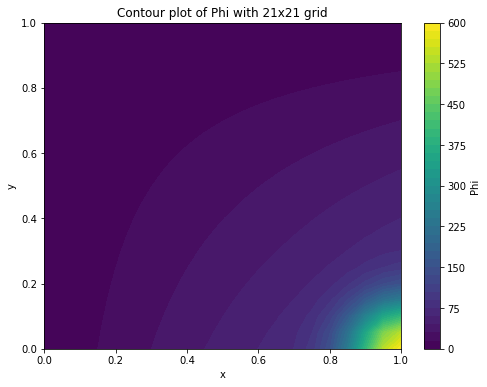

Solving for 41x41 grid...


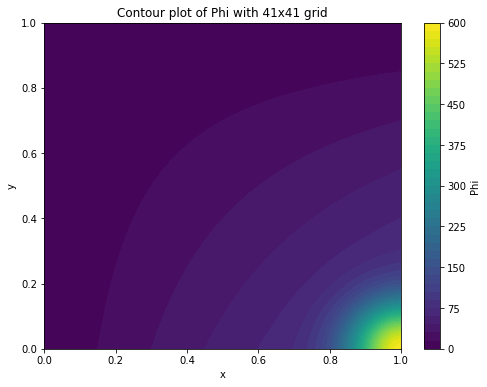

Solving for 81x81 grid...


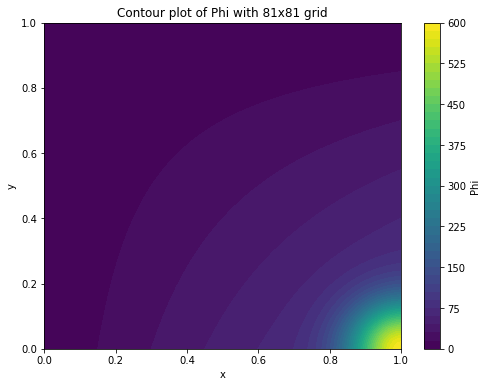

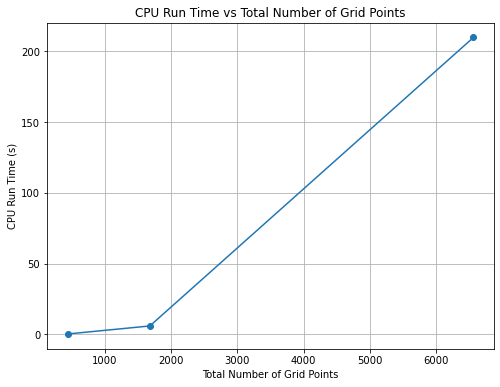

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gaussian_elimination(A, b):
    """
    Solves the system of linear equations Ax = b using Gaussian elimination.
    """
    n = len(b)
    for i in range(n):
        # Partial pivoting
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
        
        # Forward elimination
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    
    # Back substitution
    x = np.zeros_like(b)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

def solve_diffusion_gaussian_elimination(N):
    """
    Solves the 2D steady-state diffusion equation using Gaussian elimination.
    """
    # Domain setup
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    dx = 1 / (N - 1)
    dy = 1 / (N - 1)
    
    # Coefficient matrix and source term
    A = np.zeros((N*N, N*N))
    b = np.zeros(N*N)
    
    # Fill the coefficient matrix A and vector b
    for j in range(N):
        for i in range(N):
            index = j*N + i
            
            if i == 0:
                phi_x0 = 500 * np.exp(-50 * (1 + y[j]**2))
                A[index, index] = 1
                b[index] = phi_x0
            elif i == N-1:
                phi_x1 = 100 * (1 - y[j]) + 500 * np.exp(-50 * y[j]**2)
                A[index, index] = 1
                b[index] = phi_x1
            elif j == 0:
                phi_y0 = 100 * x[i] + 500 * np.exp(-50 * (1 - x[i])**2)
                A[index, index] = 1
                b[index] = phi_y0
            elif j == N-1:
                phi_y1 = 500 * np.exp(-50 * ((1 - x[i])**2 + 1))
                A[index, index] = 1
                b[index] = phi_y1
            else:
                A[index, index] = -2/dx**2 - 2/dy**2
                A[index, index-1] = 1/dx**2
                A[index, index+1] = 1/dx**2
                A[index, index-N] = 1/dy**2
                A[index, index+N] = 1/dy**2
                b[index] = 50000 * np.exp(-50 * ((1 - x[i])**2 + y[j]**2)) * (100 * ((1 - x[i])**2 + y[j]**2) - 2)
    
    # Solve the system using Gaussian elimination
    start_time = time.time()
    phi = gaussian_elimination(A, b)
    end_time = time.time()
    
    phi = phi.reshape((N, N))
    
    return phi, end_time - start_time

def plot_contour(phi, N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, phi, 50, cmap='viridis')
    plt.colorbar(label='Phi')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Contour plot of Phi with {N}x{N} grid')
    plt.show()

def main():
    grids = [21, 41, 81]
    run_times = []
    
    for N in grids:
        print(f'Solving for {N}x{N} grid...')
        phi, run_time = solve_diffusion_gaussian_elimination(N)
        run_times.append(run_time)
        plot_contour(phi, N)
    
    # Plotting CPU run time vs number of grid points
    plt.figure(figsize=(8, 6))
    plt.plot([N**2 for N in grids], run_times, marker='o')
    plt.xlabel('Total Number of Grid Points')
    plt.ylabel('CPU Run Time (s)')
    plt.title('CPU Run Time vs Total Number of Grid Points')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()


In [4]:
print (A)

NameError: name 'A' is not defined

In [6]:
print (b)


[ 9.64374924e-20  8.51057883e-20  5.84922959e-20  3.13086699e-20
  1.30513953e-20  4.23716770e-21  1.07132377e-21  2.10956158e-22
  3.23511746e-23  3.86379681e-24  3.59389087e-25  2.60340581e-26
  1.46874106e-27  6.45319783e-29  2.20816287e-30  5.88455472e-32
  1.22130037e-33  1.97404819e-35  2.48495994e-37  2.43616900e-39
  1.86003799e-41  5.00000000e+00  2.46619821e-16  1.70935592e-16
  9.27766751e-17  3.94229327e-17  1.31109170e-17  3.41142603e-18
  6.94198830e-19  1.10431183e-19  1.37268101e-20  1.33268867e-21
  1.01014991e-22  5.97540354e-24  2.75747192e-25  9.92359573e-27
  2.78424251e-28  6.08843113e-30  1.03742903e-31  1.37712600e-33
  1.42387296e-35  2.43616900e-39  1.00000000e+01  2.25266160e-14
  1.56288219e-14  8.49621656e-15  3.61803384e-15  1.20644528e-15
  3.14877044e-16  6.42928485e-17  1.02648178e-17  1.28080314e-18
  1.24834841e-19  9.49950341e-21  5.64131905e-22  2.61333035e-23
  9.44014487e-25  2.65820497e-26  5.83305555e-28  9.97219404e-30
  1.32793544e-31  1.37712